In [1]:
#!pip install mysql-connector-python

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# S8.01 -CONNEXIÓ AMB MYSQL - SPRINT 8 EJERCICIO 1

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

# Usa la conexción
cur = mydb.cursor()

# Ejecuta la consulta

cur.execute(""" 
        SELECT * 
        FROM transaction
        ORDER BY id ASC
""")

# Gurada la consulta en un objeto
myresult = cur.fetchall()

In [4]:
# Close cursor and connection
cur.close()
mydb.close()

In [5]:
df = pd.DataFrame(myresult, columns=[i[0] for i in cur.description])

In [6]:
df.head()

,id,credit_card_id,company_id,user_id,lat,longitude,timestamp,amount,declined
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,92,81.9185,-12.5276,2021-08-28 23:42:24,466.92,0
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,170,-43.9695,-117.5250,2021-07-26 07:29:18,49.53,0
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,275,-81.2227,-129.0500,2022-01-06 21:25:27,92.61,0
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,265,-34.3593,-100.5560,2022-01-26 02:07:14,394.18,0
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,92,33.7381,158.2980,2021-10-26 23:00:01,279.93,0


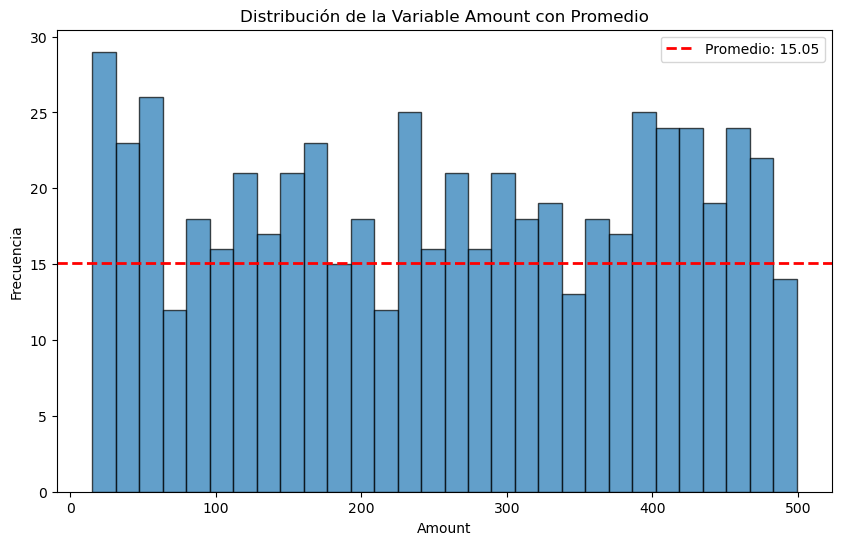

In [7]:
# Sprint 8- Exercici 2 - DOS VARIABLES NUMÉRICAS
# COMPARAMOS LA CANTIDAD  AMOUNT CON UN VALOR CALCULADO (MIN,MAX,AVERAGE, ETC...) 
# VALOR NUMÉRICO CALCULADO REPRESENTADO POR UNA LÍNA ROJA

# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para calcular el monto promedio
cur.execute(""" 
        SELECT MIN(amount) as average_amount
        FROM transaction
""")

# Obtener el resultado de la consulta
average_amount_result = cur.fetchone()
average_amount = average_amount_result[0]

# Cerrar el cursor
cur.close()

# Ejecutar la consulta para obtener todos los datos de la tabla transaction
cur = mydb.cursor()
cur.execute(""" 
        SELECT * 
        FROM transaction
        ORDER BY id ASC
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Convertir la columna 'amount' a float
df['amount'] = df['amount'].astype(float)

# Crear el histograma de la variable numérica con una línea horizontal del promedio
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=30, edgecolor='black', alpha=0.7)
plt.axhline(y=average_amount, color='r', linestyle='--', linewidth=2, label=f'Promedio: {average_amount:.2f}')
plt.title('Distribución de la Variable Amount con Promedio')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


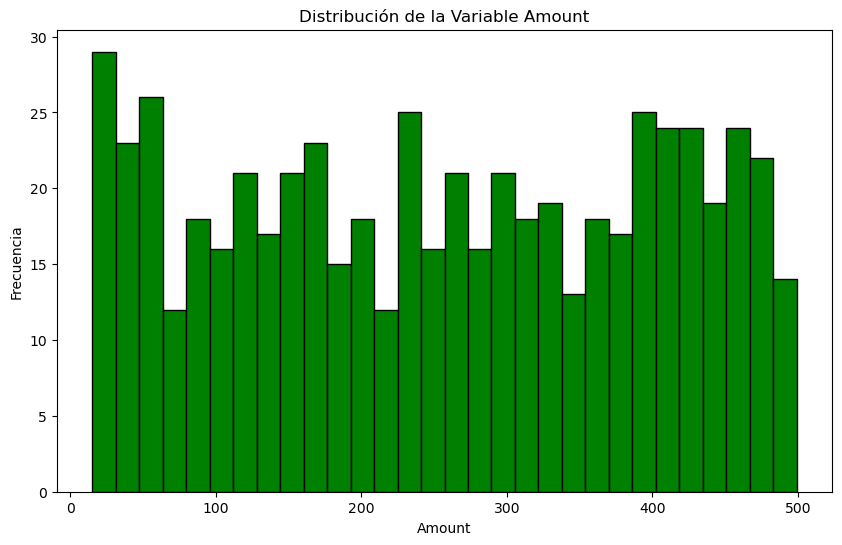

In [8]:
#SPRINT 8 - EJERCICIO 2 - DOS VARIABLES NUMÉRICAS

# Convertir la columna 'amount' a float
df['amount'] = df['amount'].astype(float)

# Seleccionar la variable numérica para visualización
variable_numerica = 'amount'

# Crear el histograma de la variable numérica
plt.figure(figsize=(10, 6))
plt.hist(df[variable_numerica], bins=30, edgecolor='black', color='g')
plt.title('Distribución de la Variable Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')

plt.show()

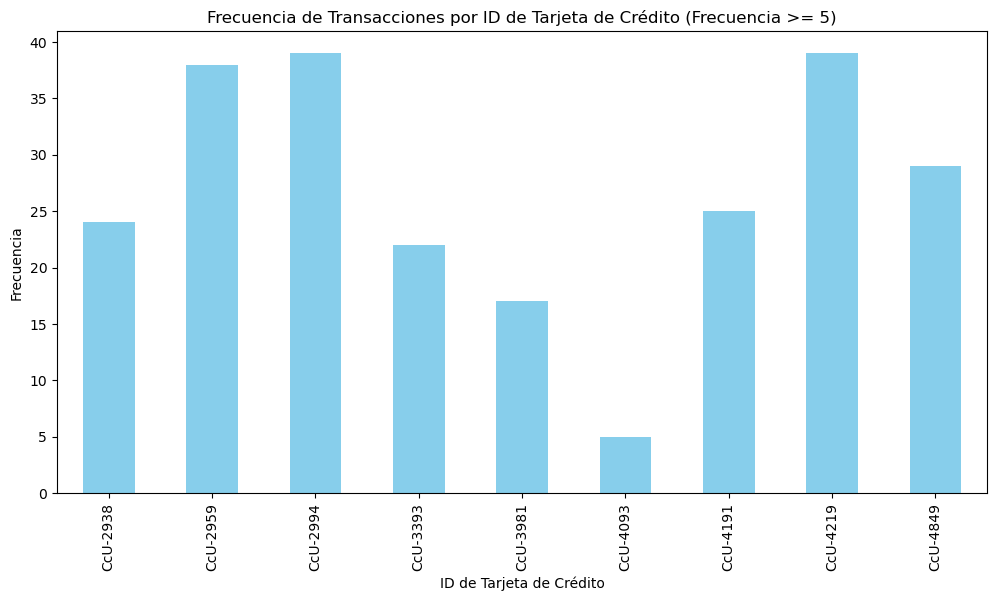

In [9]:
# SPRINT 8 - EJERCICIO 3 - UNA VARIABLE CATEGÓRICA COMO EL CREDIT CARD ID
# A EFECTOS ESTADÍSTICOS SE HAN ELIMINADO AQUELLAS CREDIT CARDS CUYA FRENCUENCIA ES IRROSORIA, 
# PARA EL CASO QUE NOS OCUPA, HEMOS CONSIDERADO DE FORMA ABRITRÁREA EL VALOR DE 3


# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para obtener los credit_card_id con frecuencia mayor o igual a 5
cur.execute(""" 
        SELECT credit_card_id, COUNT(*) as frequency
        FROM transaction
        GROUP BY credit_card_id
        HAVING COUNT(*) >= 3
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Crear un gráfico de barras para la variable categórica 'credit_card_id'
plt.figure(figsize=(12, 6))
df.set_index('credit_card_id')['frequency'].plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Transacciones por ID de Tarjeta de Crédito (Frecuencia >= 5)')
plt.xlabel('ID de Tarjeta de Crédito')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)


plt.show()

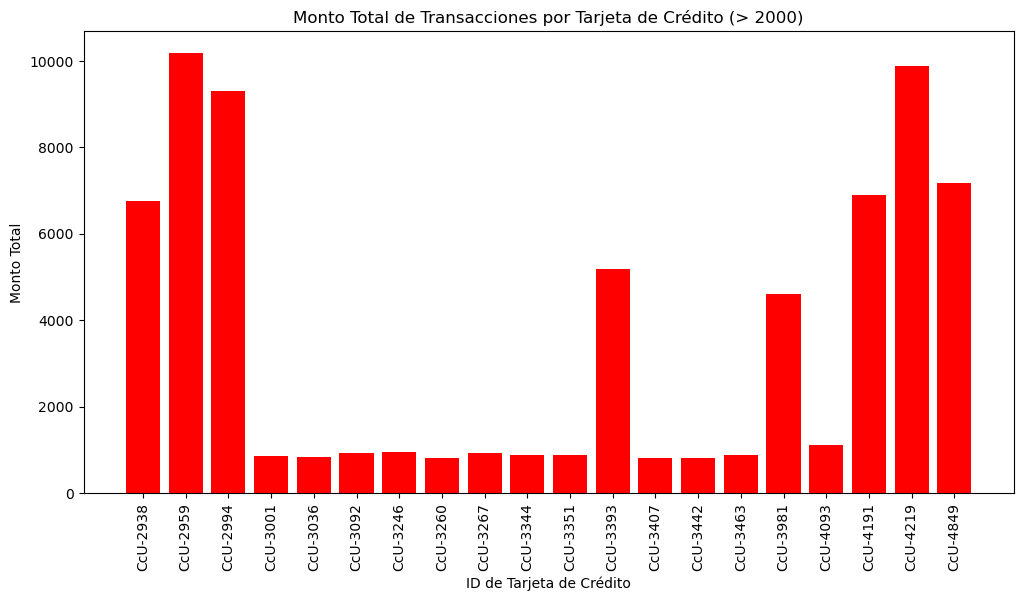

In [10]:
# Sprint 8- Exercici 4 - UNA VARIABLE NUMÉRICA COMO EL AMOUNT Y UNA CATEGÓRICA COMO EL CREDIT CARD ID
# Conexión a MySQL y carga de datos en un DataFrame
# COMO PODEMOS VER  EN EL QUERY QUE MUESTRO A CONTINUACIÓN HE DESECHADO LAS OPERACIONES DE IMPORTE
# INFIMO PUES CARECEN DE VALOR ESTADÍSTICO Y DISTORSIONAN LOS RESULADOS
"""
SELECT credit_card_id, SUM(amount) as total_amount
FROM transactions.transaction
GROUP BY credit_card_id
HAVING SUM(amount) > 800;
"""
# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta corregida
cur.execute(""" 
        SELECT credit_card_id, SUM(amount) as total_amount
        FROM transaction
        GROUP BY credit_card_id
        HAVING SUM(amount) > 800
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Convertir 'total_amount' a float
df['total_amount'] = df['total_amount'].astype(float)

# Crear el gráfico de barras del monto total por tarjeta de crédito
plt.figure(figsize=(12, 6))
plt.bar(df['credit_card_id'], df['total_amount'], color='red')
plt.title('Monto Total de Transacciones por Tarjeta de Crédito (> 2000)')
plt.xlabel('ID de Tarjeta de Crédito')
plt.ylabel('Monto Total')
plt.xticks(rotation=90)
plt.show()

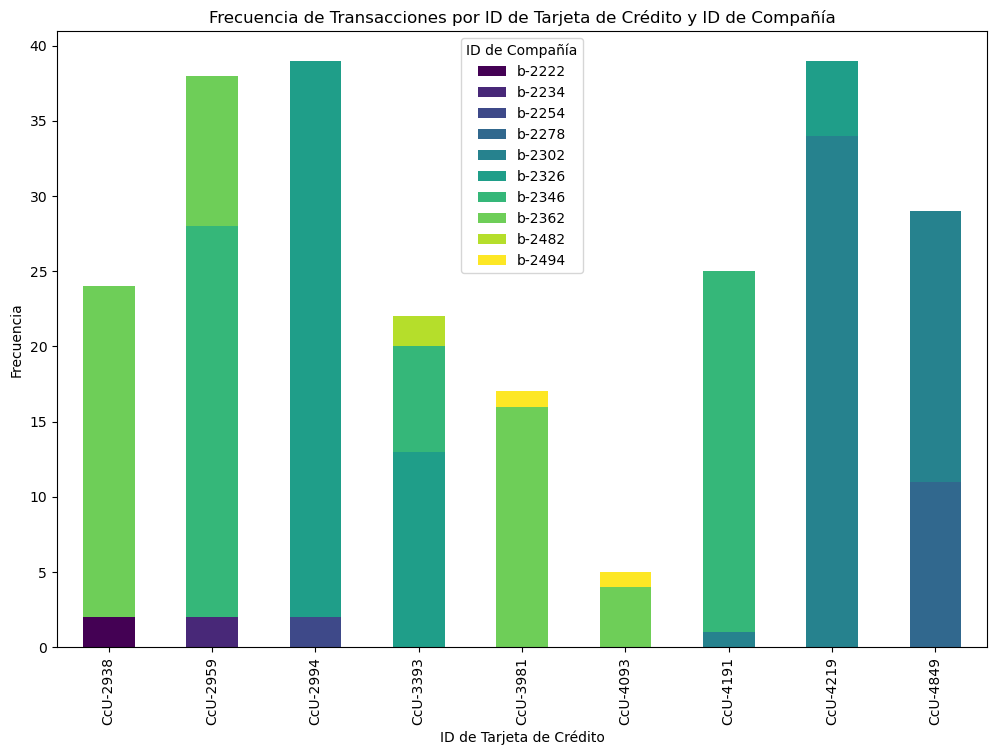

In [11]:
# Sprint 8- Exercici 5 -  DOS VARIABLES CATEGÓRICAS COMO EL COMPANY ID Y EL CREDIT CARD ID

# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para obtener datos de transaction
cur.execute(""" 
        SELECT credit_card_id, company_id
        FROM transaction
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Filtrar datos con frecuencia de credit_card_id mayor o igual a 5
df_filtered = df[df['credit_card_id'].isin(
    df['credit_card_id'].value_counts()[df['credit_card_id'].value_counts() >= 5].index
)]

# Crear una tabla cruzada (crosstab) de las dos variables categóricas
crosstab = pd.crosstab(df_filtered['credit_card_id'], df_filtered['company_id'])

# Crear un gráfico de barras apiladas
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Frecuencia de Transacciones por ID de Tarjeta de Crédito y ID de Compañía')
plt.xlabel('ID de Tarjeta de Crédito')
plt.ylabel('Frecuencia')
plt.legend(title='ID de Compañía')
plt.xticks(rotation=90)

plt.show()

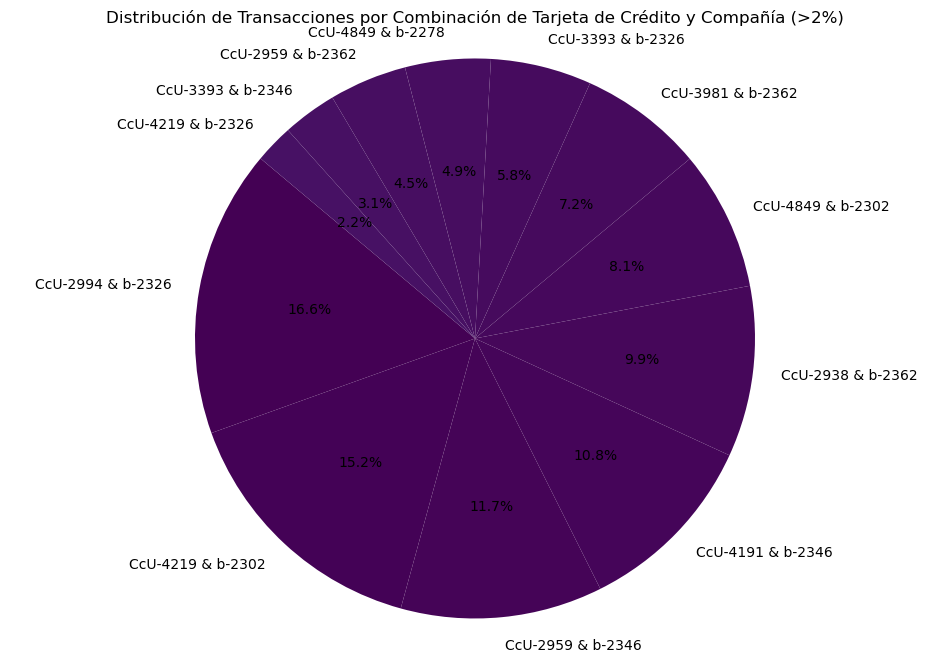

In [12]:
# Sprint 8- Exercici 5 -  DOS VARIABLES CATEGÓRICAS COMO EL COMPANY ID Y EL CREDIT CARD ID
# VISUALIZAMOS LOS MISMOS RESULTADOS EN UN CHART TIPO PIE, PUES CREEMOS QUE ESTE FORMATO FAVORECE MUCHO LA COMPRENSIÓN DE LOS DATOS.

# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para obtener datos de transaction
cur.execute(""" 
        SELECT credit_card_id, company_id
        FROM transaction
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Filtrar datos con frecuencia de credit_card_id mayor o igual a 5
df_filtered = df[df['credit_card_id'].isin(
    df['credit_card_id'].value_counts()[df['credit_card_id'].value_counts() >= 5].index
)]

# Crear una columna combinada de 'credit_card_id' y 'company_id'
df_filtered['combined_id'] = df_filtered['credit_card_id'] + ' & ' + df_filtered['company_id']

# Contar las frecuencias de las combinaciones
combined_counts = df_filtered['combined_id'].value_counts()

# Calcular el porcentaje de cada combinación
total_count = combined_counts.sum()
combined_percentages = combined_counts / total_count * 100

# Filtrar combinaciones con un porcentaje mayor o igual al 2%
combined_percentages_filtered = combined_percentages[combined_percentages >= 2]

# Crear el gráfico de pastel
plt.figure(figsize=(12, 8))
plt.pie(combined_percentages_filtered, labels=combined_percentages_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(combined_percentages_filtered))))
plt.title('Distribución de Transacciones por Combinación de Tarjeta de Crédito y Compañía (>2%)')
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo

plt.show()

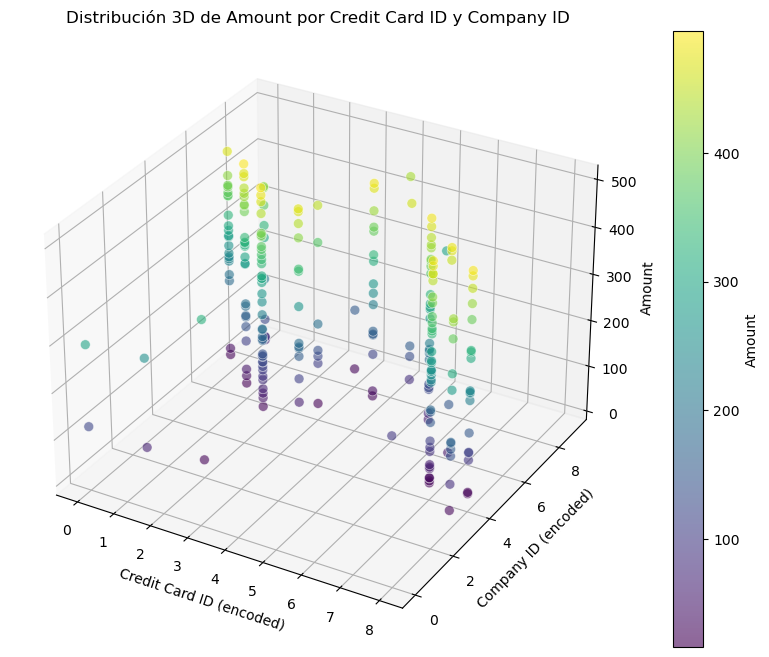

In [14]:
# SPRINT 8 - NIVEL 1 , EJERCICIO 6 -  TRES VARIABLES
# Conexión a MySQL y carga de datos en un DataFrame

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para obtener datos de transaction
cur.execute(""" 
        SELECT credit_card_id, company_id, amount
        FROM transaction
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Filtrar datos con frecuencia de credit_card_id mayor o igual a 5
df_filtered = df[df['credit_card_id'].isin(
    df['credit_card_id'].value_counts()[df['credit_card_id'].value_counts() >= 5].index
)]

# Convertir 'amount' a float
df_filtered['amount'] = df_filtered['amount'].astype(float)

# Convertir 
label_encoder_cc = LabelEncoder()
label_encoder_company = LabelEncoder()
df_filtered['credit_card_id_encoded'] = label_encoder_cc.fit_transform(df_filtered['credit_card_id'])
df_filtered['company_id_encoded'] = label_encoder_company.fit_transform(df_filtered['company_id'])

# Crear el gráfico de dispersión 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
sc = ax.scatter(df_filtered['credit_card_id_encoded'], df_filtered['company_id_encoded'], df_filtered['amount'], c=df_filtered['amount'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)

# Etiquetas y título
ax.set_title('Distribución 3D de Amount por Credit Card ID y Company ID')
ax.set_xlabel('Credit Card ID (encoded)')
ax.set_ylabel('Company ID (encoded)')
ax.set_zlabel('Amount')

# Añadir barra de color
cbar = plt.colorbar(sc)
cbar.set_label('Amount')

plt.show()

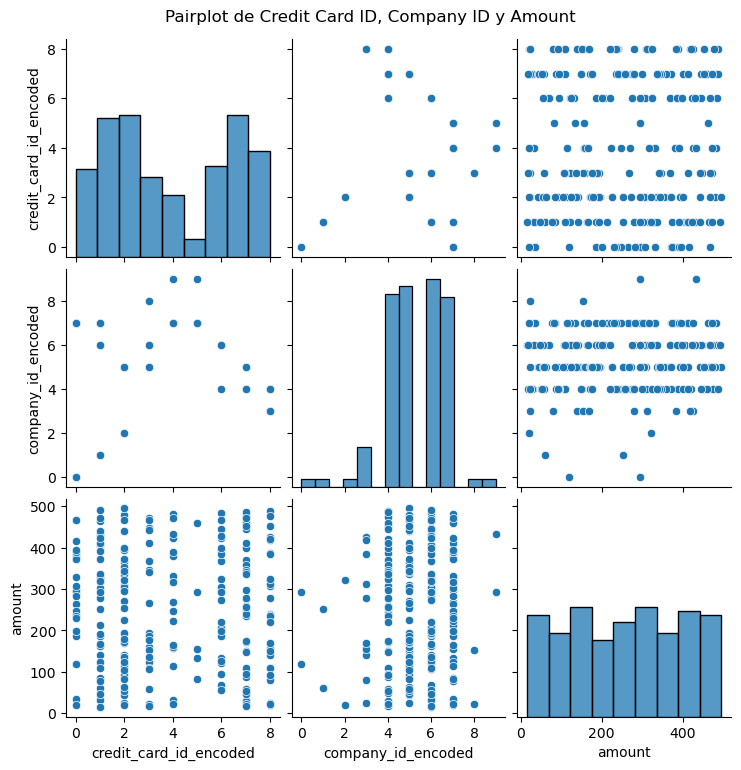

In [15]:
# SPRINT 8 - NIVEL 1 , EJERCICIO 7 -  USO DE PAIRPLOT, LA LIBERRIA ADECUADA ES SEABORN

import seaborn as sns
# Conexión a MySQL y carga de datos en un DataFrame
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Plus7070",
  database="transactions"
)

cur = mydb.cursor()

# Ejecutar la consulta para obtener datos de transaction
cur.execute(""" 
        SELECT credit_card_id, company_id, amount
        FROM transaction
""")

myresult = cur.fetchall()
column_names = [i[0] for i in cur.description]
cur.close()
mydb.close()

df = pd.DataFrame(myresult, columns=column_names)

# Filtrar datos con frecuencia de credit_card_id mayor o igual a 5
df_filtered = df[df['credit_card_id'].isin(
    df['credit_card_id'].value_counts()[df['credit_card_id'].value_counts() >= 5].index
)]

# Convertir 'amount' a float
df_filtered['amount'] = df_filtered['amount'].astype(float)

# Convertir variables categóricas a valores numéricos
label_encoder_cc = LabelEncoder()
label_encoder_company = LabelEncoder()
df_filtered['credit_card_id_encoded'] = label_encoder_cc.fit_transform(df_filtered['credit_card_id'])
df_filtered['company_id_encoded'] = label_encoder_company.fit_transform(df_filtered['company_id'])

# Crear el pairplot
sns.pairplot(df_filtered[['credit_card_id_encoded', 'company_id_encoded', 'amount']])
plt.suptitle('Pairplot de Credit Card ID, Company ID y Amount', y=1.02)

plt.show()


In [ ]:
df.info()